In [8]:
import sys
print(sys.executable)


F:\Anaconda3\python.exe


In [10]:
!F:\Anaconda3\python.exe -m pip install openpyxl

  Using cached openpyxl-3.1.3-py2.py3-none-any.whl (251 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [6]:
import pandas as pd
df=pd.read_excel(r"F:\JNotebook\financeanalysis\中国国际收支平衡表时间序列（美元）.xlsx")
df

中国国际收支平衡表（年度表）    Unnamed: 1  \
0                                               单位:亿美元           NaN   
1                                                   年份   2017.000000   
2                                              1. 经常账户   1886.761261   
3                                                   贷方  27471.433429   
4                                                   借方 -25584.672168   
..                                                 ...           ...   
137  3.“贷方”按正值列示，“借方”按负值列示，差额等于“贷方”加上“借方”。本表除标注“贷方”...           NaN   
138  4. 金融账户下，对外金融资产的净增加用负值列示，净减少用正值列示。对外负债的净增加用正值列...           NaN   
139                    5. 2023年，我国直接投资负债中资本金新增1200亿美元。           NaN   
140                       6.《国际收支平衡表》采用修订机制，最新数据以此表为准。           NaN   
141  7.受数据源所限制，1950-1981年国际收支平衡表部分服务贸易无法细分子项，统一归类至其...           NaN   

       Unnamed: 2    Unnamed: 3    Unnamed: 4    Unnamed: 5    Unnamed: 6  \
0             NaN           NaN           NaN           NaN           NaN   
1     2018.000000   2019.000000   2020.000000   2021.000000   2022.000000   
2      241.309092   1029.098760   2488.356439   3528.857546   4433.742571   
3    29472.627612  29304.209326  30204.190447  39313.412628  40341.498543   
4   -29231.318520 -28275.110566 -27715.834008 -35784.555082 -35907.755972   
..            ...           ...           ...           ...           ...   
137           NaN           NaN           NaN           NaN           NaN   
138           NaN           NaN           NaN           NaN           NaN   
139           NaN           NaN           NaN           NaN           NaN   
140           NaN           NaN           NaN           NaN           NaN   
141           NaN           NaN           NaN           NaN           NaN   

       Unnamed: 7  
0             NaN  
1     2023.000000  
2     2529.872713  
3    37887.253758  
4   -35357.381044  
..            ...  
137           NaN  
138           NaN  
139           NaN  
140           NaN  
141           NaN  

[142 rows x 8 columns]

In [24]:
import pandas as pd

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\中国国际收支平衡表时间序列（美元）.xlsx")

# 获取并打印 Excel 文件中的所有 sheet 名称
sheet_names = xls.sheet_names

print("All Sheet Names:")
print(sheet_names)

# 逐个读取每个 sheet 并打印其前几行数据
for sheet_name in sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    print(f"\nSheet Name: {sheet_name}")
    print(df.head())

# 填充缺失值或者删除含有缺失值的行
df.fillna(0, inplace=True)
df.dropna(inplace=True)

import re

for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x: float(re.sub(r'[^\d.-]+', '', str(x))))

# 将第一行作为列名并且删除原先的第一行
df.columns = df.iloc[0]
df = df.iloc[1:]

All Sheet Names:
['年度BOP（美元） ', '季度BOP（美元）']

Sheet Name: 年度BOP（美元） 
  中国国际收支平衡表（年度表）    Unnamed: 1    Unnamed: 2    Unnamed: 3    Unnamed: 4  \
0         单位:亿美元           NaN           NaN           NaN           NaN   
1             年份   2017.000000   2018.000000   2019.000000   2020.000000   
2        1. 经常账户   1886.761261    241.309092   1029.098760   2488.356439   
3             贷方  27471.433429  29472.627612  29304.209326  30204.190447   
4             借方 -25584.672168 -29231.318520 -28275.110566 -27715.834008   

     Unnamed: 5    Unnamed: 6    Unnamed: 7  
0           NaN           NaN           NaN  
1   2021.000000   2022.000000   2023.000000  
2   3528.857546   4433.742571   2529.872713  
3  39313.412628  40341.498543  37887.253758  
4 -35784.555082 -35907.755972 -35357.381044  

Sheet Name: 季度BOP（美元）
  中国国际收支平衡表（季度表）   Unnamed: 1   Unnamed: 2   Unnamed: 3   Unnamed: 4  \
0         单位:亿美元          NaN          NaN          NaN          NaN   
1             项目       2017Q1  

In [31]:
import pandas as pd

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\中国国际收支平衡表时间序列（美元）.xlsx")

# 获取 Excel 文件中的所有 sheet 名称
sheet_names = xls.sheet_names

# 逐个读取每个 sheet 并进行数据预处理
for sheet_name in sheet_names:
    print(f"\nProcessing Sheet: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=None)  

    # 删除第一行和第二行
    df = df.drop([0, 1])

    # 将第一列作为列名
    df.columns = df.iloc[0]
    df = df.drop(2)  # 删除第一列

    # 重新设置索引
    df.reset_index(drop=True, inplace=True)

    # 填充缺失值
    df.fillna(0, inplace=True)

    # 假设第二列开始都是需要转换的数值列
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # 打印处理后的前几行数据以做检查
    print(df.head())



Processing Sheet: 年度BOP（美元） 
2         年份        2017.0        2018.0        2019.0        2020.0  \
0    1. 经常账户   1886.761261    241.309092   1029.098760   2488.356439   
1         贷方  27471.433429  29472.627612  29304.209326  30204.190447   
2         借方 -25584.672168 -29231.318520 -28275.110566 -27715.834008   
3  1.A 货物和服务   2170.098999    879.051485   1318.442973   3585.726082   
4         贷方  24292.773562  26510.096022  26309.992369  27388.979867   

2        2021.0        2022.0        2023.0  
0   3528.857546   4433.742571   2529.872713  
1  39313.412628  40341.498543  37887.253758  
2 -35784.555082 -35907.755972 -35357.381044  
3   4614.942928   5776.089397   3860.631518  
4  35552.314780  37193.198443  35112.477521  

Processing Sheet: 季度BOP（美元）
2         项目       2017Q1       2017Q2       2017Q3       2017Q4       2018Q1  \
0    1. 经常账户   209.168649   538.015789   431.501681   708.075142  -397.732088   
1         贷方  6000.534170  6818.718879  7044.412358  7607.768022  6558

In [1]:
import pandas as pd

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\中国国际收支平衡表时间序列（美元）.xlsx")

# 获取 Excel 文件中的所有 sheet 名称
sheet_names = xls.sheet_names

# 创建 ExcelWriter 对象
excel_writer = pd.ExcelWriter('processed_data.xlsx', engine='xlsxwriter')

# 逐个读取每个 sheet 并进行数据预处理
for sheet_name in sheet_names:
    print(f"\nProcessing Sheet: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=None)  # 不使用头部，保留所有数据

    # 删除包含特定关键词的行
    df = df[~df[0].str.contains(r'资产|负债|借方|贷方', na=False)]

    # 删除第一行和第二行
    df = df.drop([0, 1])

    # 将第一列作为列名
    df.columns = df.iloc[0]
    df = df.drop(2)  # 删除第一列

    # 重新设置索引
    df.reset_index(drop=True, inplace=True)

    # 填充缺失值
    df.fillna(0, inplace=True)

    # 假设第二列开始都是需要转换的数值列
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # 将处理后的数据写入 Excel 文件中的不同 sheet
    df.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# 保存并关闭 Excel 文件
excel_writer.close()


Processing Sheet: 年度BOP（美元） 

Processing Sheet: 季度BOP（美元）


In [11]:
import pandas as pd

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data.xlsx")

# 获取 Excel 文件中的所有 sheet 名称
sheet_names = xls.sheet_names

# 创建一个 ExcelWriter 对象
excel_writer = pd.ExcelWriter('processed_data_transposed.xlsx', engine='xlsxwriter')

# 逐个处理每个 sheet
for sheet_name in sheet_names:
    print(f"\nProcessing Sheet: {sheet_name}")
    
    # 读取每个工作表的数据
    df_sheet = pd.read_excel(xls, sheet_name=sheet_name)

    # 转置数据框
    df_transposed = df_sheet.transpose()

    # 重新设置列名
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed.drop(df_transposed.index[0])

    # 重新设置索引
    df_transposed.reset_index(drop=True, inplace=True)

    # 缩短工作表名称并添加后缀
    short_sheet_name = sheet_name[:10]
    # 将处理后的数据写入 Excel 文件中的不同 sheet
    df_transposed.to_excel(excel_writer, sheet_name=short_sheet_name + '_transposed', index=False)

# 关闭 ExcelWriter 对象以保存并关闭 Excel 文件
excel_writer.close()



Processing Sheet: 年度BOP（美元） 

Processing Sheet: 季度BOP（美元）


                                         count         mean         std          min          25%          50%          75%         max
项目                                                                                                                                   
    1.A.b.1 加工服务                       7.0   145.901025   22.591661   120.386522   130.920823   134.906885   162.614320  178.943480
    1.A.b.10 其他商业服务                  7.0   269.678754  105.517989   169.271901   192.645461   195.053989   359.689287  418.755891
    1.A.b.11 个人、文化和娱乐服务          7.0   -21.797104    6.091120   -31.356264   -25.265871   -19.901677   -19.146428  -12.497190
    1.A.b.12 别处未提及的政府货物和服务    7.0   -18.278117    5.177267   -27.148188   -20.193053   -17.568024   -16.171399  -10.501700
    1.A.b.2 维护和维修服务                 7.0    44.582554    9.359658    37.120360    39.960347    40.739422    44.782277   64.732847
...                                        ...          ...         ...          ...      

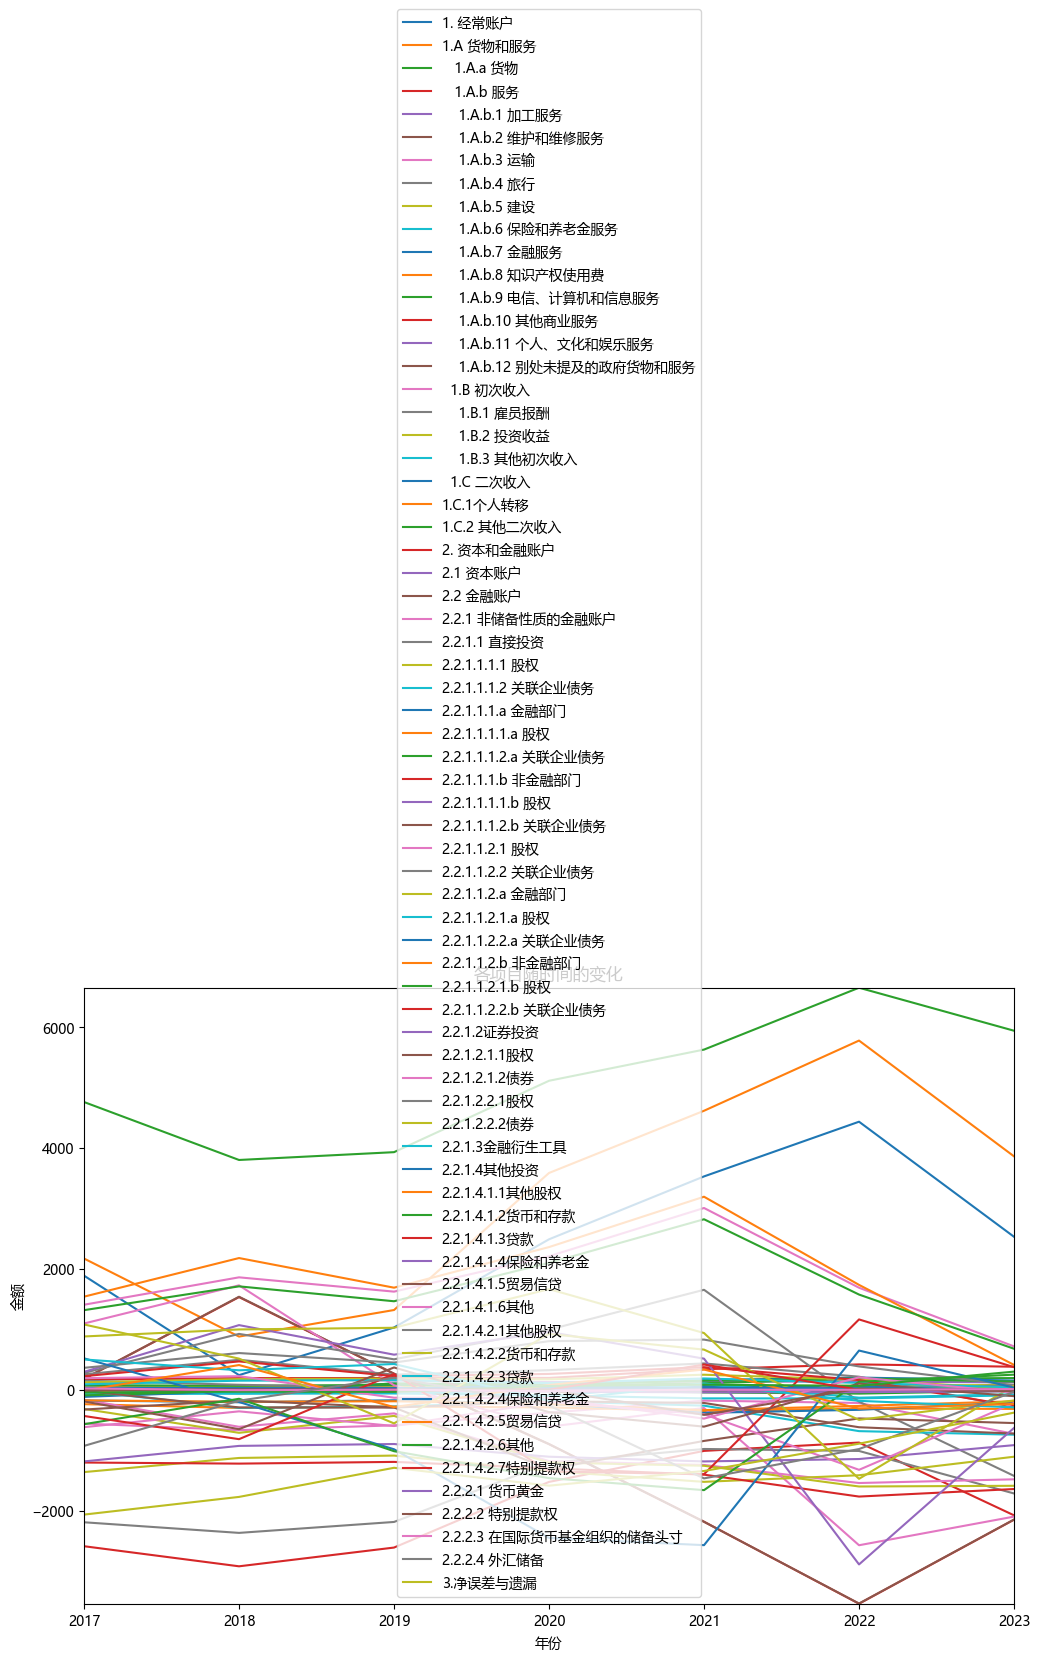

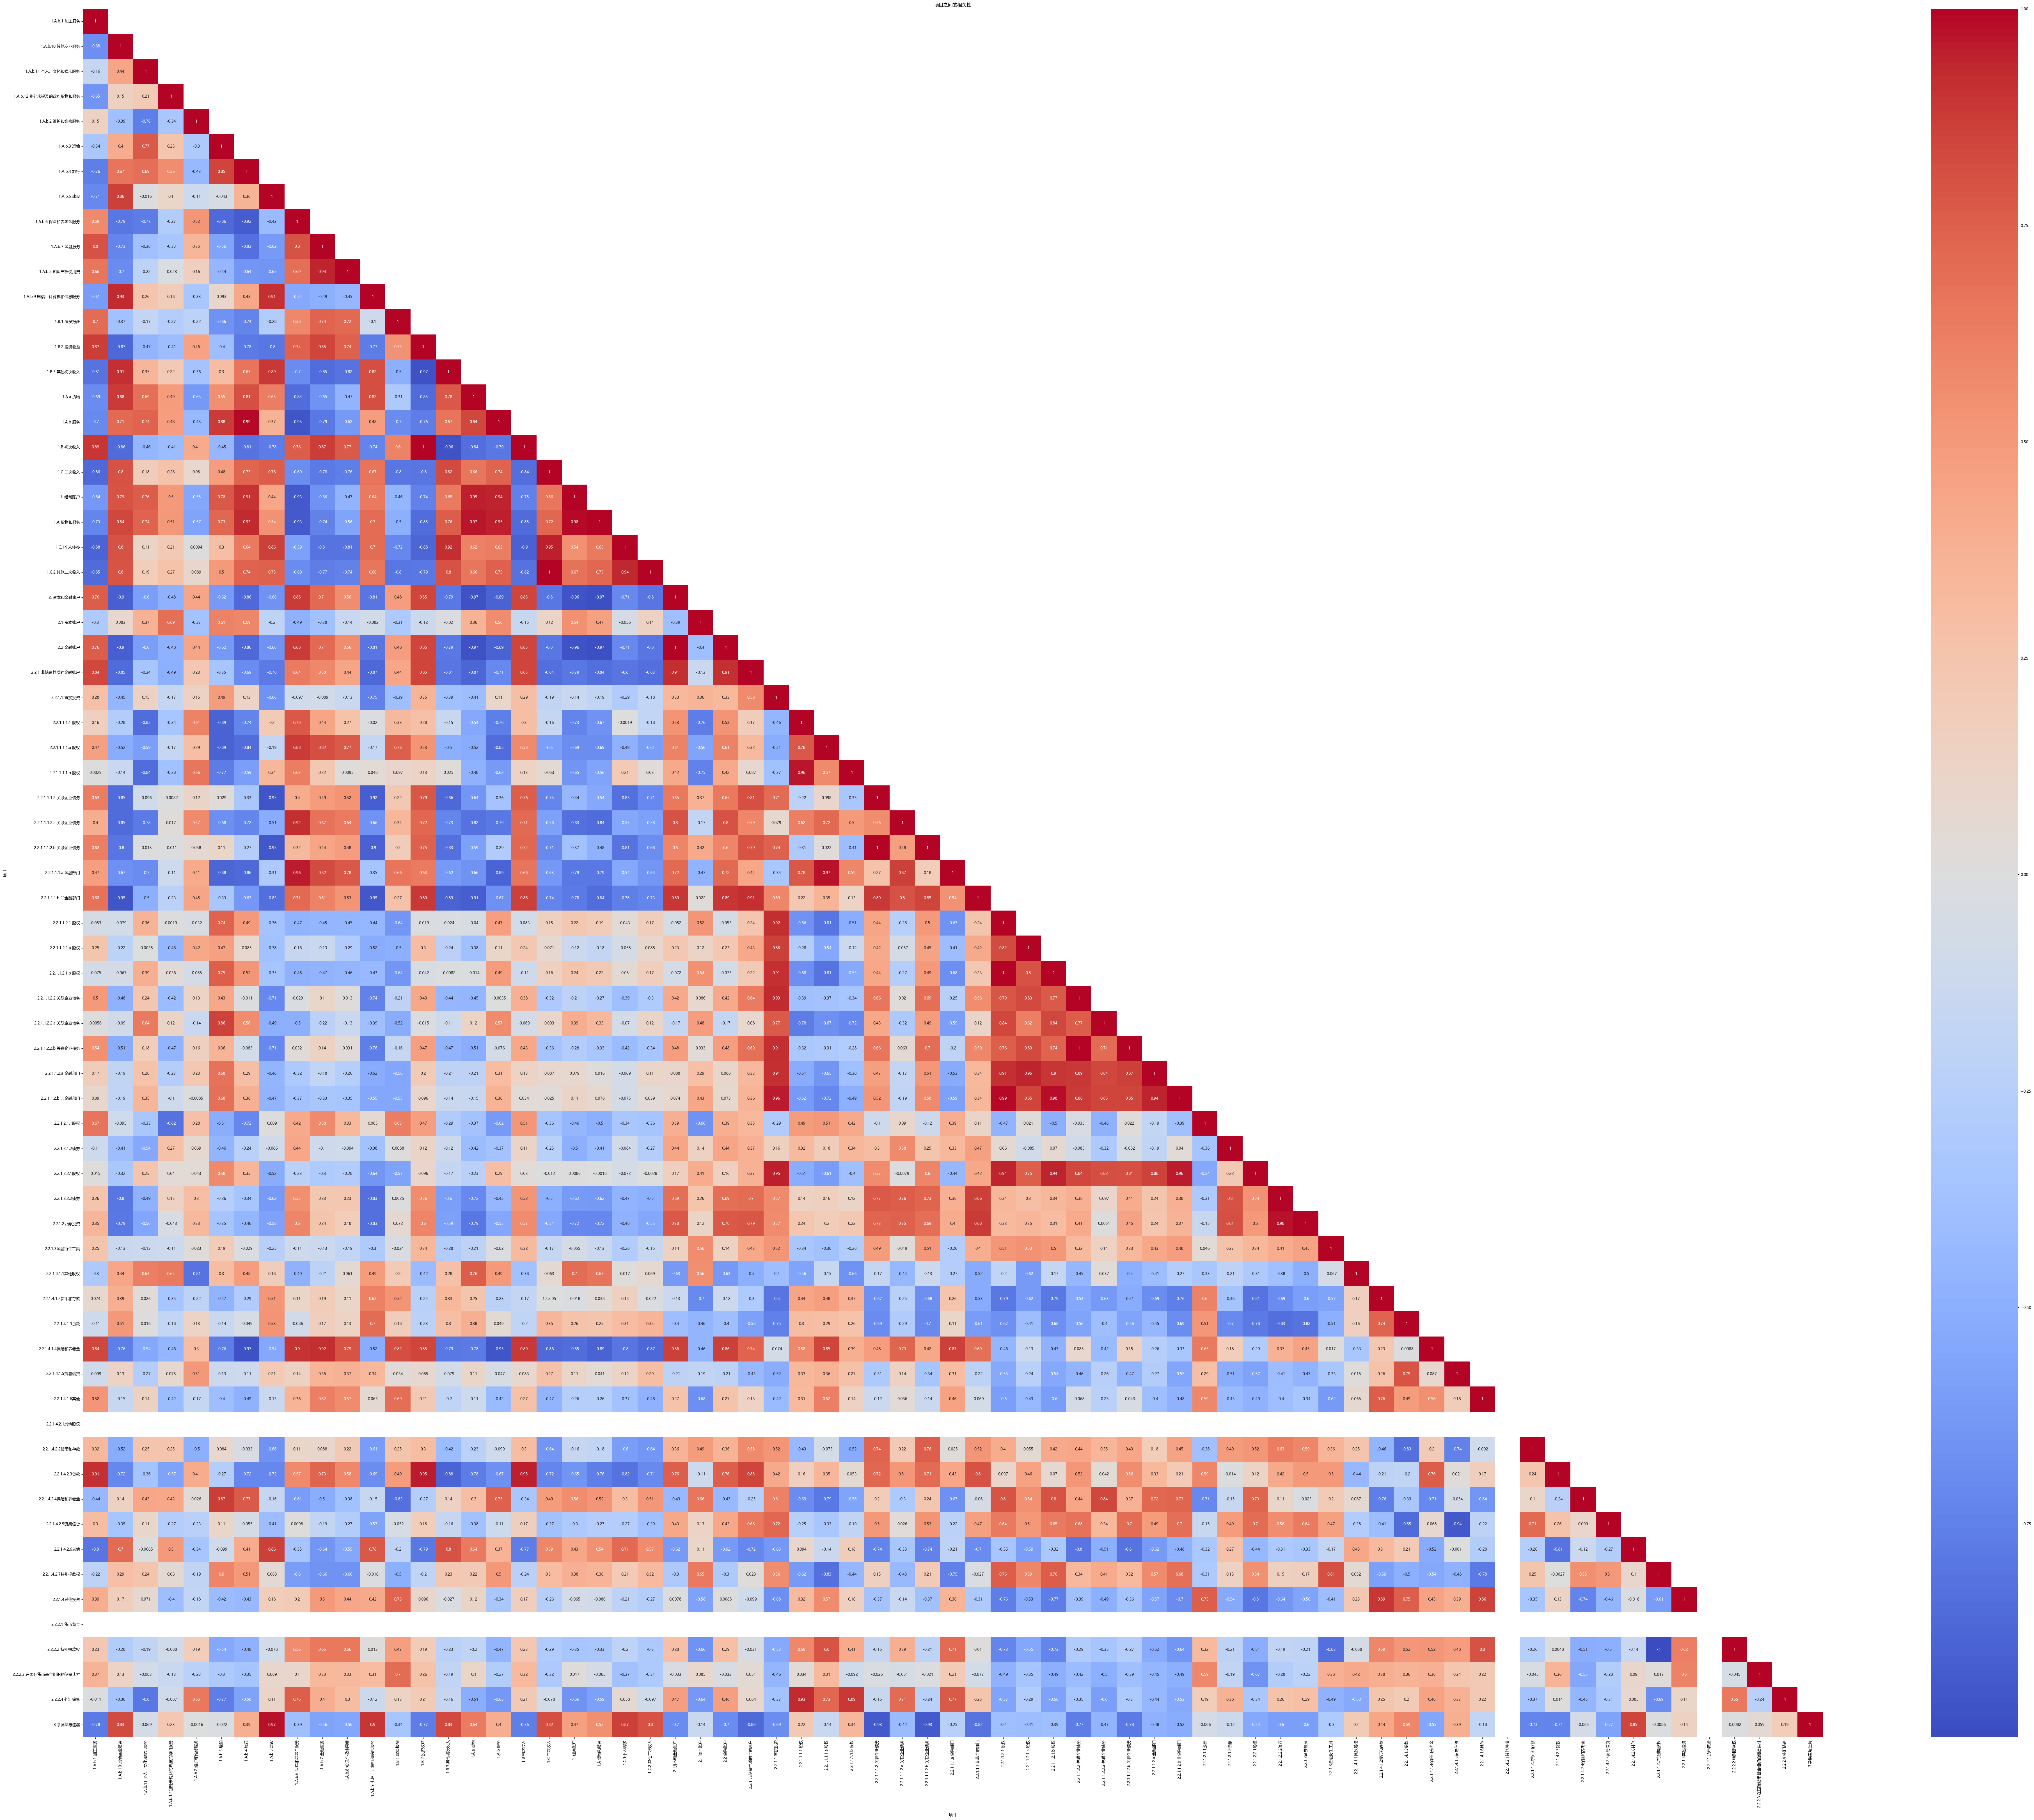

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed.xlsx")
data = pd.read_excel(xls, '年度BOP（美元） _transposed') 

# 展开数据结构
data_flat = pd.DataFrame(data.set_index('年份').stack()).reset_index()
data_flat.columns = ['年份', '项目', '金额']

# 统计描述
statistics = data_flat.groupby('项目')['金额'].describe()

# 规范化输出结果
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 1000)  # 设置显示宽度
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
print(statistics)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft YaHei' 

# 时间序列分析 - 折线图
plt.figure(figsize=(12, 8))  # 设置图形大小
for item in data_flat['项目'].unique():
    plt.plot(data_flat[data_flat['项目'] == item]['年份'], 
             data_flat[data_flat['项目'] == item]['金额'], label=item)
plt.xlabel('年份')
plt.ylabel('金额')
plt.title('各项目随时间的变化')
plt.legend()
plt.xlim(data_flat['年份'].min(), data_flat['年份'].max())  # 设置 x 轴范围
plt.ylim(data_flat['金额'].min(), data_flat['金额'].max())  # 设置 y 轴范围
plt.show()

# 绘制热力图
correlation_data = data_flat.pivot_table(index='年份', columns='项目', values='金额').corr()
# 将对角线和上三角部分设置为 NaN
correlation_data.values[np.triu_indices_from(correlation_data, k=1)] = np.nan

plt.figure(figsize=(100, 80))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('项目之间的相关性')
plt.show()


                                         count        mean         std         min         25%         50%         75%         max
项目                                                                                                                              
    1.A.b.1 加工服务                      28.0   36.475256    5.544903   29.099810   32.205112   34.655127   40.352251   46.904592
    1.A.b.10 其他商业服务                 28.0   67.419688   28.435792   19.921379   45.134462   61.480696   86.528808  122.160147
    1.A.b.11 个人、文化和娱乐服务         28.0   -5.449276    1.983806   -9.938145   -6.614572   -5.305618   -4.220935   -1.860040
    1.A.b.12 别处未提及的政府货物和服务   28.0   -4.569529    4.133992  -11.039525   -8.420815   -4.062243   -0.972770    4.896915
    1.A.b.2 维护和维修服务                28.0   11.145638    3.758008    6.841837    8.746543   10.353495   12.446866   25.616962
...                                        ...         ...         ...         ...         ...         ...         ...       

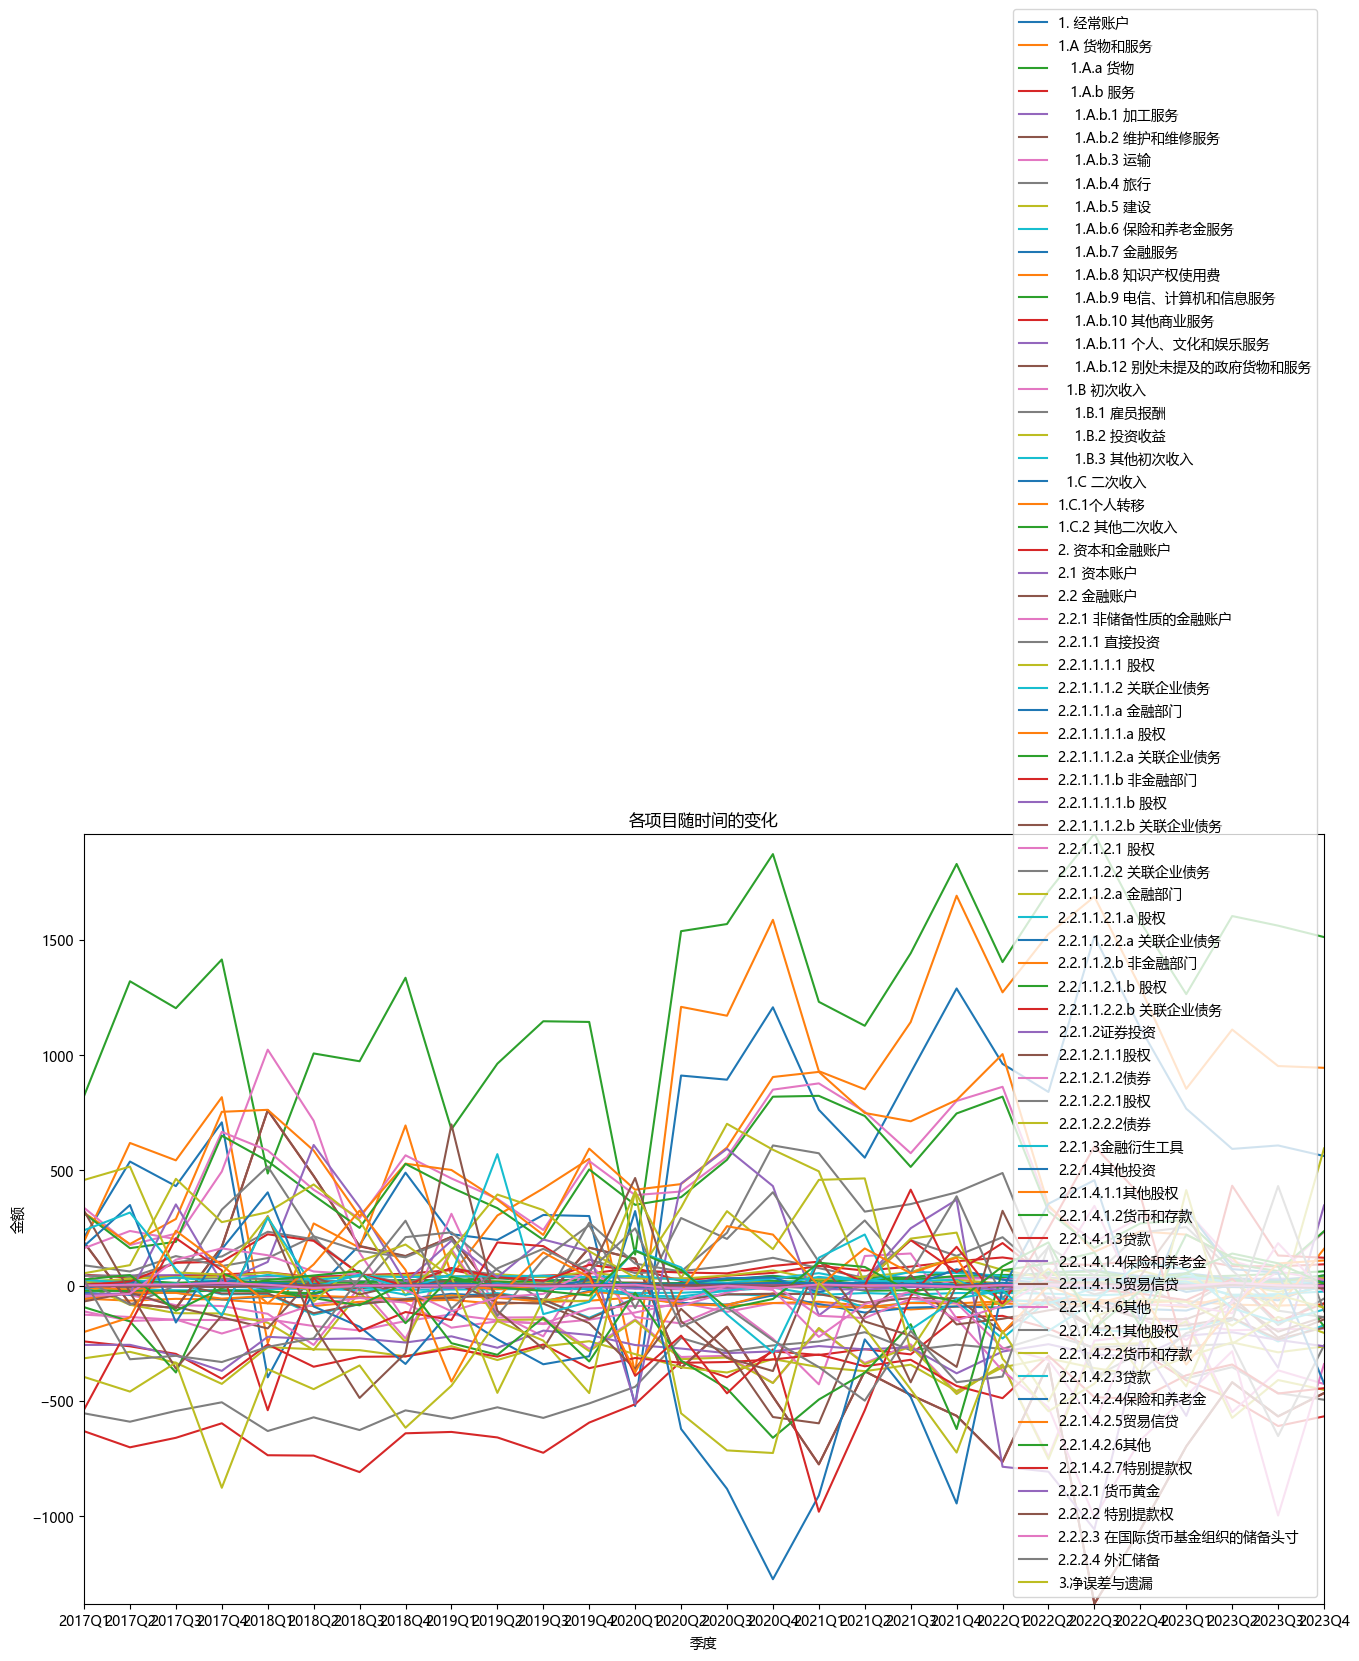

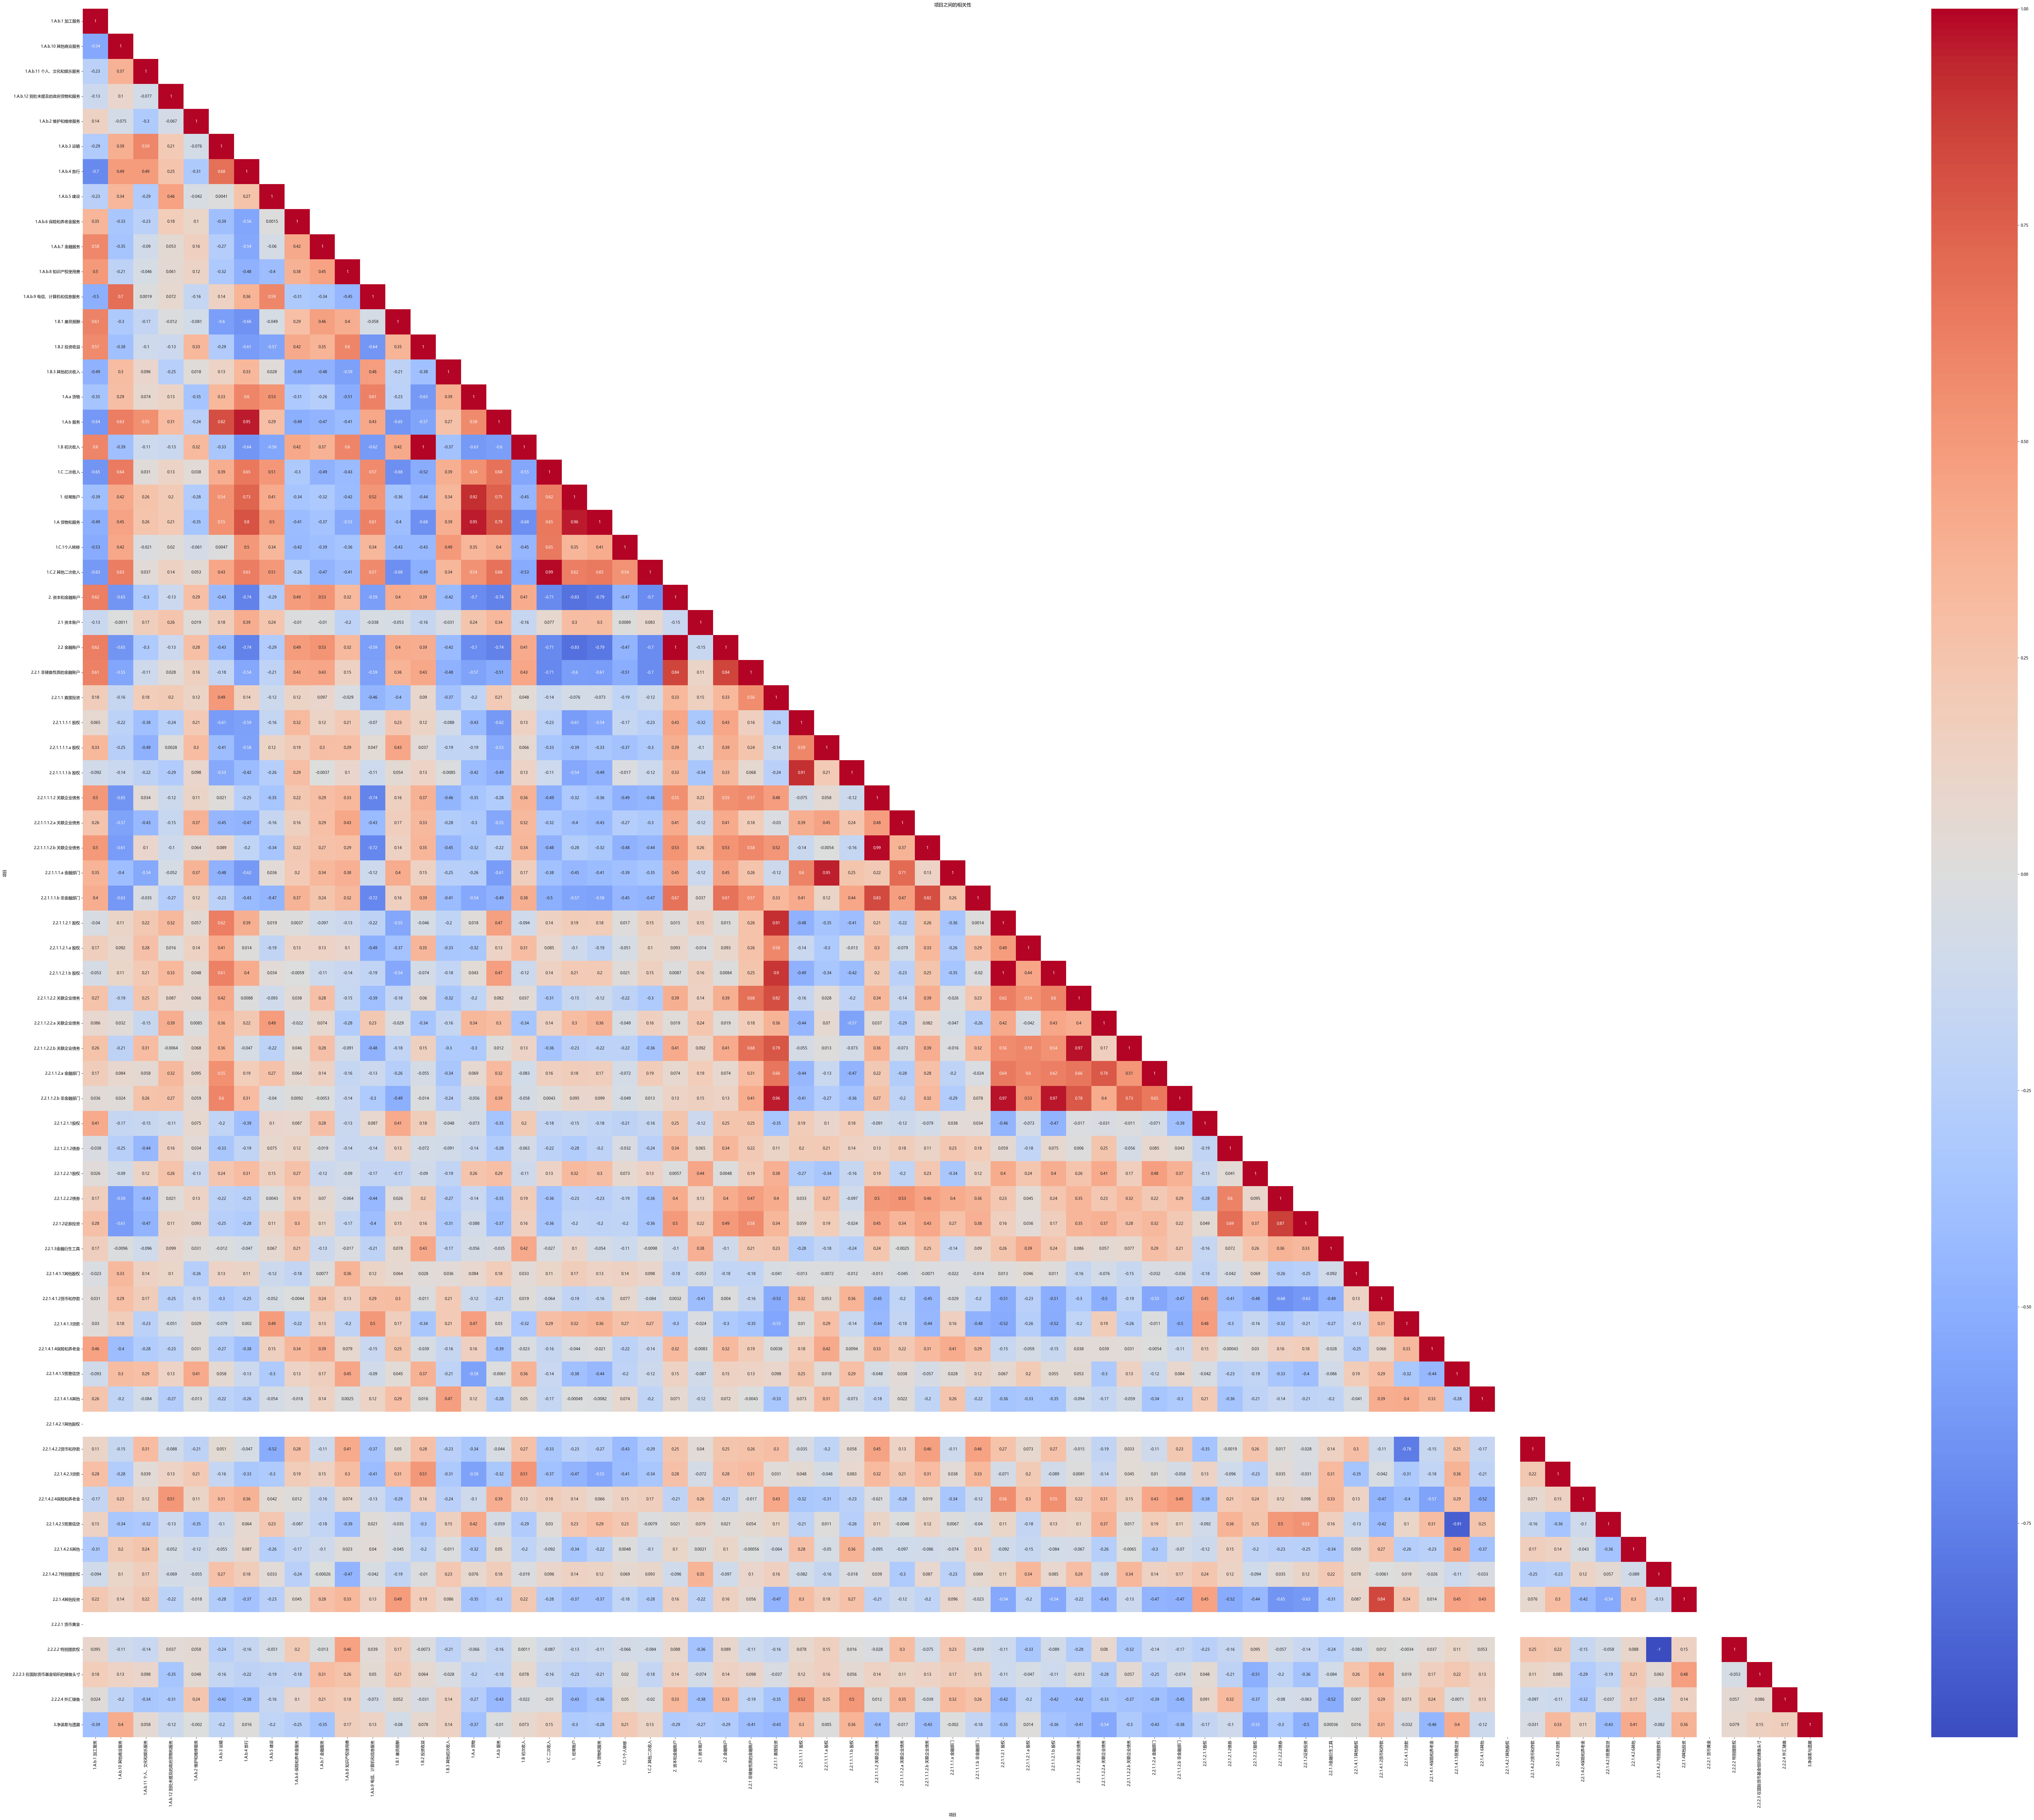

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed.xlsx")
data = pd.read_excel(xls, '季度BOP（美元）_transposed') 

# 展开数据结构
data_flat = pd.DataFrame(data.set_index('季度').stack()).reset_index()
data_flat.columns = ['季度', '项目', '金额']

# 统计描述
statistics = data_flat.groupby('项目')['金额'].describe()

# 规范化输出结果
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 1000)  # 设置显示宽度
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
print(statistics)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft YaHei' 

# 时间序列分析 - 折线图
plt.figure(figsize=(16, 10))  # 设置图形大小
for item in data_flat['项目'].unique():
    plt.plot(data_flat[data_flat['项目'] == item]['季度'], 
             data_flat[data_flat['项目'] == item]['金额'], label=item)
plt.xlabel('季度')
plt.ylabel('金额')
plt.title('各项目随时间的变化')
plt.legend()
plt.xlim(data_flat['季度'].min(), data_flat['季度'].max())  # 设置 x 轴范围
plt.ylim(data_flat['金额'].min(), data_flat['金额'].max())  # 设置 y 轴范围
plt.show()

# 绘制热力图
correlation_data = data_flat.pivot_table(index='季度', columns='项目', values='金额').corr()
# 将对角线和上三角部分设置为 NaN
correlation_data.values[np.triu_indices_from(correlation_data, k=1)] = np.nan

plt.figure(figsize=(100, 80))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('项目之间的相关性')
plt.show()


In [43]:
!F:\Anaconda3\python.exe -m pip install statsmodels

F:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
F:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


未来三年的预测值： 7    3246.894099
8    3772.044948
9    4812.124247
Name: predicted_mean, dtype: float64


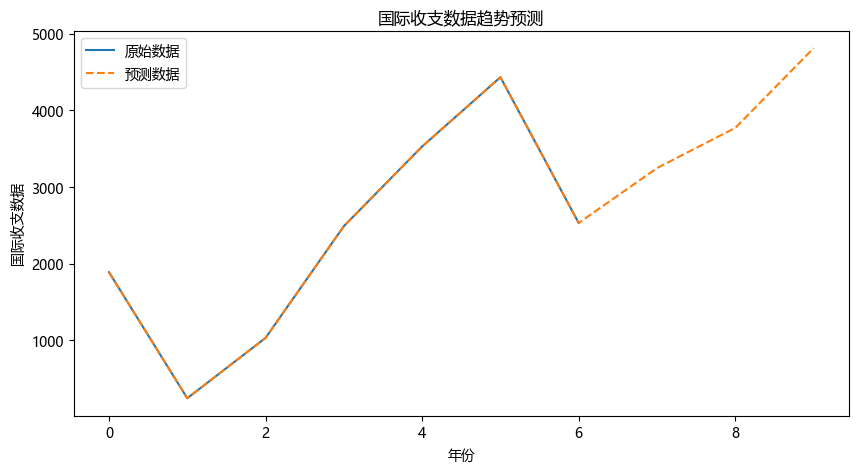

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed.xlsx")
data_yearly = pd.read_excel(xls, '年度BOP（美元） _transposed') 

# 选择需要预测的列
column_of_interest = '1. 经常账户'

# 使用年度数据进行预测
ts_yearly = data_yearly[column_of_interest]

# 拟合 ARIMA 模型
model = ARIMA(ts_yearly, order=(6,2,2))
fit_model = model.fit()

# 预测未来三年的数据
forecast = fit_model.forecast(steps=3)

print("未来三年的预测值：", forecast)

# 绘制原始数据和预测值的对比图
plt.figure(figsize=(10, 5))
plt.plot(ts_yearly, label='原始数据')
plt.plot(pd.concat([ts_yearly, pd.Series(forecast, index=range(len(ts_yearly), len(ts_yearly) + 3))]), label='预测数据', linestyle='--')
plt.xlabel('年份')
plt.ylabel('国际收支数据')
plt.title('国际收支数据趋势预测')
plt.legend()
plt.show()


F:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


未来四季度的预测值： 28    704.741242
29    701.904418
30    707.315241
31    685.041640
Name: predicted_mean, dtype: float64


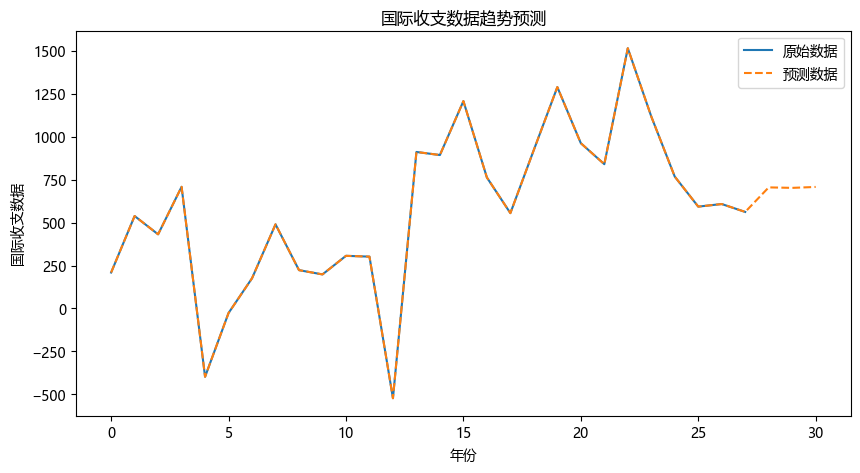

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed.xlsx")
data_yearly = pd.read_excel(xls, '季度BOP（美元）_transposed') 

# 选择需要预测的列
column_of_interest = '1. 经常账户'

# 使用年度数据进行预测
ts_yearly = data_yearly[column_of_interest]

# 拟合 ARIMA 模型
model = ARIMA(ts_yearly, order=(6,2,2)) 
fit_model = model.fit()

# 预测未来四季度的数据
forecast = fit_model.forecast(steps=4)
print("未来四季度的预测值：", forecast)

# 绘制原始数据和预测值的对比图
plt.figure(figsize=(10, 5))
plt.plot(ts_yearly.index, ts_yearly, label='原始数据')
plt.plot(pd.concat([ts_yearly, pd.Series(forecast, index=range(len(ts_yearly), len(ts_yearly) + 3))]), label='预测数据', linestyle='--')
plt.xlabel('年份')
plt.ylabel('国际收支数据')
plt.title('国际收支数据趋势预测')
plt.legend()
plt.show()

F:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
F:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


未来三年的预测值： 7    -350.629740
8   -2061.897288
9   -1559.050819
Name: predicted_mean, dtype: float64


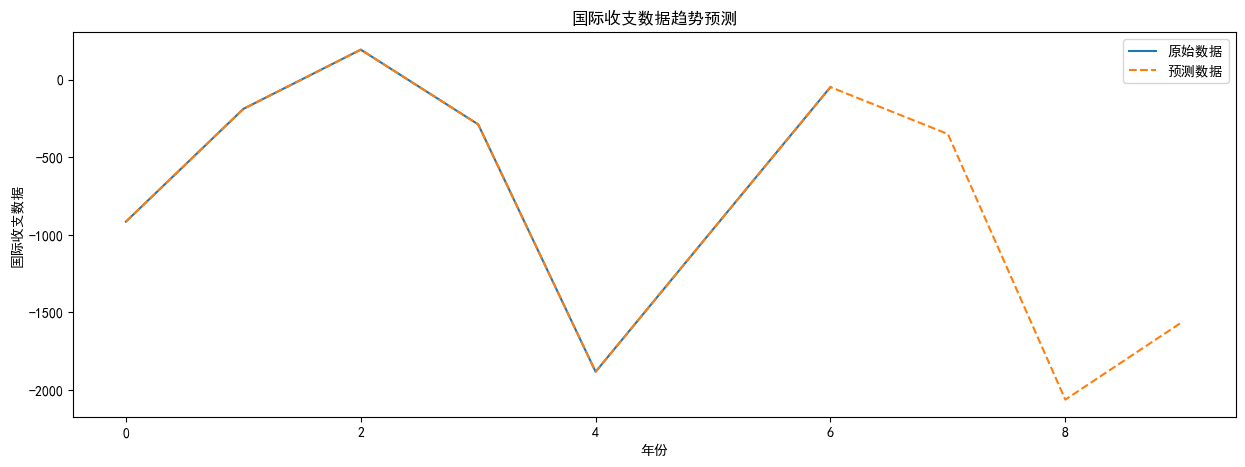

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed.xlsx")
data_yearly = pd.read_excel(xls, '年度BOP（美元） _transposed')

# 选择需要预测的列
column_of_interest = '2.2.2 储备资产'

# 使用年度数据进行预测
ts_yearly = data_yearly[column_of_interest]

# 拟合 ARIMA 模型
model = ARIMA(ts_yearly, order=(6,2,2))
fit_model = model.fit()

# 预测未来三年的数据
forecast = fit_model.forecast(steps=3)
print("未来三年的预测值：", forecast)

# 绘制原始数据和预测值的对比图
plt.figure(figsize=(15, 5))
plt.plot(ts_yearly, label='原始数据')
plt.plot(pd.concat([ts_yearly, pd.Series(forecast, index=range(len(ts_yearly), len(ts_yearly) + 3))]), label='预测数据', linestyle='--')
plt.xlabel('年份')
plt.ylabel('国际收支数据')
plt.title('国际收支数据趋势预测')
plt.legend()
plt.show()


F:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


未来四季度的预测值： 28     51.576490
29    -49.258491
30     -9.750070
31    230.684833
Name: predicted_mean, dtype: float64


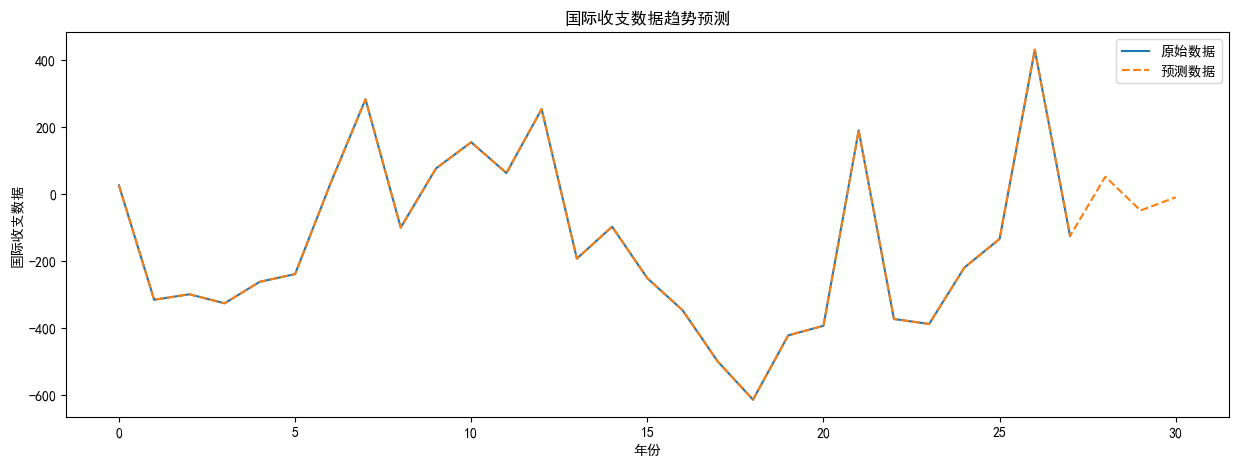

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed.xlsx")
data_yearly = pd.read_excel(xls, '季度BOP（美元）_transposed') 

# 选择需要预测的列
column_of_interest = '2.2.2 储备资产'

# 使用年度数据进行预测
ts_yearly = data_yearly[column_of_interest]

# 拟合 ARIMA 模型
model = ARIMA(ts_yearly, order=(6,2,2)) 
fit_model = model.fit()

# 预测未来四季度的数据
forecast = fit_model.forecast(steps=4)
print("未来四季度的预测值：", forecast)

# 绘制原始数据和预测值的对比图
plt.figure(figsize=(15, 5))
plt.plot(ts_yearly.index, ts_yearly, label='原始数据')
plt.plot(pd.concat([ts_yearly, pd.Series(forecast, index=range(len(ts_yearly), len(ts_yearly) + 3))]), label='预测数据', linestyle='--')
plt.xlabel('年份')
plt.ylabel('国际收支数据')
plt.title('国际收支数据趋势预测')
plt.legend()
plt.show()

In [18]:
import pandas as pd
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed _Instances.xlsx")
data_yearly = pd.read_excel(xls, '年度BOP（美元） _transposed')

# 选择需要预测的列
target_variable = '1. 经常账户'

# 创建待搜索的参数空间
p_values = [0, 1, 2, 3, 4, 5]
d_values = [0, 1, 2]
q_values = [0, 1, 2, 3, 4, 5]
parameters = product(p_values, d_values, q_values)

# 记录最优参数和最小 AIC
best_aic = float("inf")
best_params = None

# 遍历参数空间进行网格搜索
for param in parameters:
    try:
        model = ARIMA(data_yearly[target_variable], order=param)
        fit_model = model.fit()
        aic = fit_model.aic
        if aic < best_aic:
            best_aic = aic
            best_params = param
    except:
        continue

print("最优参数:", best_params)
print("最小 AIC:", best_aic)


F:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
F:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'

最优参数: (5, 2, 4)
最小 AIC: 20.0


F:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


F:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
F:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


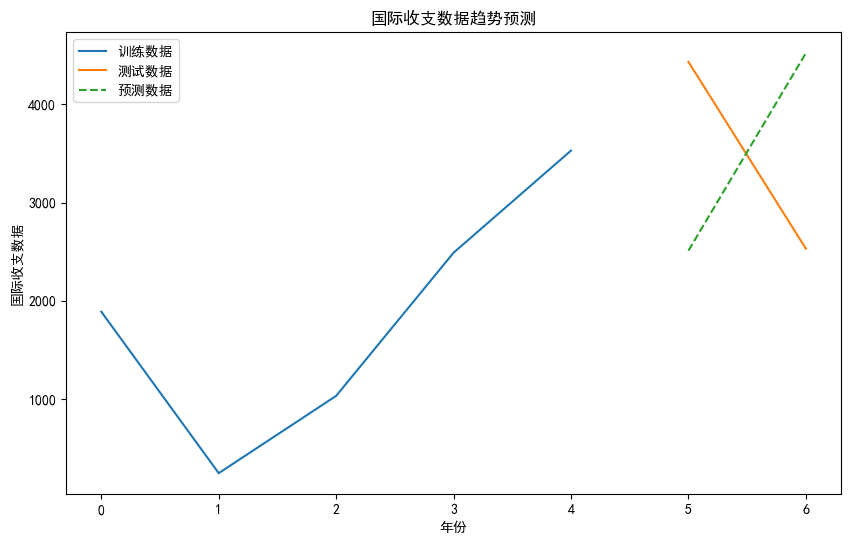

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed _Instances.xlsx")
data_yearly = pd.read_excel(xls, '年度BOP（美元） _transposed')

# 选择需要预测的列
target_variable = '1. 经常账户'
predictor_variables = [
    '1.A 货物和服务',
    '  1.B 初次收入',
    '  1.C 二次收入',
    '2. 资本和金融账户',
    '2.1 资本账户',
    '2.2 金融账户',
    '3.净误差与遗漏'
]

# 创建一个新 DataFrame，只包含目标变量和预测变量
selected_data = data_yearly[[target_variable.strip()] + predictor_variables].copy()

# 删除包含 NaN 值的行
selected_data.dropna(inplace=True)

# 拆分数据集为训练集和测试集
train_size = int(len(selected_data) * 0.8)
train_data, test_data = selected_data.iloc[:train_size], selected_data.iloc[train_size:]

# 创建并训练 ARIMA 模型
model = ARIMA(train_data[target_variable.strip()], order=(5, 2, 4))
fit_model = model.fit()

# 预测测试集数据
forecast = fit_model.forecast(steps=len(test_data))

# 绘制原始数据和预测值的对比图
plt.figure(figsize=(10, 6))
plt.plot(train_data[target_variable.strip()], label='训练数据')
plt.plot(test_data.index, test_data[target_variable.strip()], label='测试数据')
plt.plot(test_data.index, forecast, label='预测数据', linestyle='--')
plt.xlabel('年份')
plt.ylabel('国际收支数据')
plt.title('国际收支数据趋势预测')
plt.legend()
plt.show()


F:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


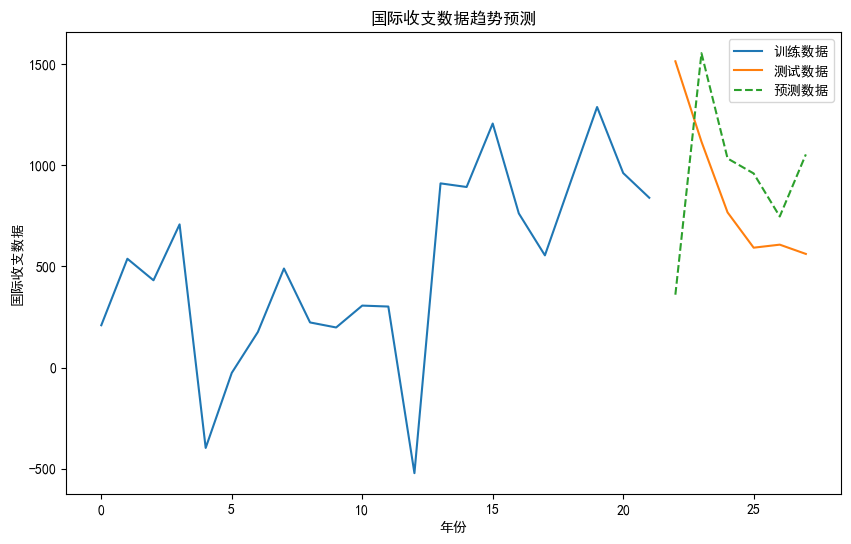

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed _Instances.xlsx")
data_yearly = pd.read_excel(xls, '季度BOP（美元）_transposed') 

# 选择需要预测的列
target_variable = '1. 经常账户'
predictor_variables = [
    '1.A 货物和服务',
    '  1.B 初次收入',
    '  1.C 二次收入',
    '2. 资本和金融账户',
    '2.1 资本账户',
    '2.2 金融账户',
    '3.净误差与遗漏'
]

# 创建一个新 DataFrame，只包含目标变量和预测变量
selected_data = data_yearly[[target_variable.strip()] + predictor_variables].copy()

# 删除包含 NaN 值的行
selected_data.dropna(inplace=True)

# 拆分数据集为训练集和测试集
train_size = int(len(selected_data) * 0.8)
train_data, test_data = selected_data.iloc[:train_size], selected_data.iloc[train_size:]

# 创建并训练 ARIMA 模型
model = ARIMA(train_data[target_variable.strip()], order=(5, 2, 4))
fit_model = model.fit()

# 预测测试集数据
forecast = fit_model.forecast(steps=len(test_data))

# 绘制原始数据和预测值的对比图
plt.figure(figsize=(10, 6))
plt.plot(train_data[target_variable.strip()], label='训练数据')
plt.plot(test_data.index, test_data[target_variable.strip()], label='测试数据')
plt.plot(test_data.index, forecast, label='预测数据', linestyle='--')
plt.xlabel('年份')
plt.ylabel('国际收支数据')
plt.title('国际收支数据趋势预测')
plt.legend()
plt.show()


In [25]:
import pandas as pd

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed.xlsx")
data_yearly = pd.read_excel(xls, '年度BOP（美元） _transposed')

# 计算相关系数矩阵
correlation_matrix = data_yearly.corr()

print(correlation_matrix)


                              年份   1. 经常账户  1.A 货物和服务     1.A.a 货物  \
年份                      1.000000  0.694010   0.783199     0.807049   
1. 经常账户                 0.694010  1.000000   0.984590     0.946053   
1.A 货物和服务               0.783199  0.984590   1.000000     0.968601   
   1.A.a 货物             0.807049  0.946053   0.968601     1.000000   
   1.A.b 服务             0.680868  0.943415   0.948298     0.839615   
...                          ...       ...        ...          ...   
2.2.2.1 货币黄金                 NaN       NaN        NaN          NaN   
2.2.2.2 特别提款权          -0.209371 -0.348351  -0.329315    -0.198682   
2.2.2.3 在国际货币基金组织的储备头寸 -0.111696  0.016908  -0.064928     0.103336   
2.2.2.4 外汇储备           -0.073826 -0.660910  -0.586951    -0.510913   
3.净误差与遗漏                0.927666  0.468329   0.554136     0.636479   

                           1.A.b 服务      1.A.b.1 加工服务      1.A.b.2 维护和维修服务  \
年份                         0.680868         -0.915025            -0.226635   
1. 

In [27]:
import pandas as pd

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed.xlsx")
data_yearly = pd.read_excel(xls, '季度BOP（美元）_transposed') 

# 选择数值型列
numeric_data = data_yearly.select_dtypes(include=['float64', 'int64'])

# 计算相关系数矩阵
correlation_matrix = numeric_data.corr()

print(correlation_matrix)

                         1. 经常账户  1.A 货物和服务     1.A.a 货物     1.A.b 服务  \
1. 经常账户                 1.000000   0.958182     0.920654     0.748496   
1.A 货物和服务               0.958182   1.000000     0.954683     0.793735   
   1.A.a 货物             0.920654   0.954683     1.000000     0.576731   
   1.A.b 服务             0.748496   0.793735     0.576731     1.000000   
    1.A.b.1 加工服务       -0.390770  -0.493005    -0.350126    -0.637663   
...                          ...        ...          ...          ...   
2.2.2.1 货币黄金                 NaN        NaN          NaN          NaN   
2.2.2.2 特别提款权          -0.134180  -0.108463    -0.065648    -0.163548   
2.2.2.3 在国际货币基金组织的储备头寸 -0.231878  -0.212706    -0.196296    -0.182671   
2.2.2.4 外汇储备           -0.433106  -0.356150    -0.268495    -0.428847   
3.净误差与遗漏               -0.297335  -0.282781    -0.374791    -0.010220   

                            1.A.b.1 加工服务      1.A.b.2 维护和维修服务      1.A.b.3 运输  \
1. 经常账户                        -0.390770  

In [29]:
import pandas as pd
import statsmodels.api as sm

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed.xlsx")
data_yearly = pd.read_excel(xls, '季度BOP（美元）_transposed')

# 选择需要预测的列
target_variable = '1. 经常账户'
predictor_variables = [
    '1.A 货物和服务',
    '  1.B 初次收入',
    '  1.C 二次收入',
    '2. 资本和金融账户',
    '2.1 资本账户',
    '2.2 金融账户',
    '3.净误差与遗漏'
]

# 创建目标变量和预测变量的DataFrame
X = data_yearly[predictor_variables]
y = data_yearly[target_variable]

# 添加常数列作为截距
X = sm.add_constant(X)

# 拟合多元线性回归模型
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                1. 经常账户   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.912e+29
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          5.07e-321
Time:                        01:51:48   Log-Likelihood:                 731.53
No. Observations:                  28   AIC:                            -1451.
Df Residuals:                      22   BIC:                            -1443.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.121e-13   5.61e-13      0.735      0.4

In [31]:
import pandas as pd
import statsmodels.api as sm

xls = pd.ExcelFile(r"F:\JNotebook\financeanalysis\processed_data_transposed.xlsx")
data_yearly = pd.read_excel(xls, '年度BOP（美元） _transposed')

# 选择需要预测的列
target_variable = '1. 经常账户'
predictor_variables = [
    '1.A 货物和服务',
    '  1.B 初次收入',
    '  1.C 二次收入',
    '2. 资本和金融账户',
    '2.1 资本账户',
    '2.2 金融账户',
    '3.净误差与遗漏'
]

# 创建目标变量和预测变量的DataFrame
X = data_yearly[predictor_variables]
y = data_yearly[target_variable]

# 添加常数列作为截距
X = sm.add_constant(X)

# 拟合多元线性回归模型
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                1. 经常账户   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.059e+27
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           2.33e-14
Time:                        01:52:22   Log-Likelihood:                 163.20
No. Observations:                   7   AIC:                            -314.4
Df Residuals:                       1   BIC:                            -314.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.276e-12   1.51e-10      0.048      0.9

F:\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [8]:
!F:\Anaconda3\python.exe -m pip install scikit-learn